# Calculating covarince matrix

In [1]:
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import netCDF4 as n
%matplotlib inline

In [7]:
# reading test
path = "./files/"
filenames = ["specific_humidity_Europa_sp.nc", "relative_humidity_Europa_sp.nc", "pressure_Europa_sp.nc",  
             "temperature_Europa_sp.nc", "total_cloud_cover_Europa_sp.nc"]


cloud = n.Dataset(path + filenames[-1], "r")
relative = n.Dataset(path + filenames[1], "r")
specific = n.Dataset(path + filenames[0], "r")
pressure = n.Dataset(path + filenames[2], "r")
temperature = n.Dataset(path + filenames[3], "r")

#print(cloud.variables)
tcc = cloud.variables["tcc"][:].data

# Retriving ground values, these are available at six different pressure levels. 
rel = relative.variables["r"][:][0].data
#level = relative.variables["level"][:][0].data
spe = specific.variables["q"][:][0].data

surf_pre = pressure.variables["sp"][:].data
temp = temperature.variables["t2m"][:].data

In [60]:
"""Be avare of the units in time """
time

<class 'netCDF4._netCDF4.Variable'>
int32 time(time)
    units: hours since 1900-01-01 00:00:0.0
    long_name: time
    calendar: gregorian
unlimited dimensions: time
current shape = (32,)
filling on, default _FillValue of -2147483647 used

In [65]:
""" EQUAL """
time = cloud.variables["time"][:].data
lat = cloud.variables["latitude"][:].data
long = cloud.variables["longitude"][:].data

In [8]:
relative.variables["r"].shape

(32, 6, 61, 77)

In [59]:
print( "Shape " + str(tcc.shape))
rel = relative.variables["r"]


Shape (32, 61, 77)


In [67]:
#lat = cloud.variables["latitude"]
#long = cloud.variables["longitude"]
print(lat.shape, long.shape, lat, long)

(61,) (77,) [75.   74.25 73.5  72.75 72.   71.25 70.5  69.75 69.   68.25 67.5  66.75
 66.   65.25 64.5  63.75 63.   62.25 61.5  60.75 60.   59.25 58.5  57.75
 57.   56.25 55.5  54.75 54.   53.25 52.5  51.75 51.   50.25 49.5  48.75
 48.   47.25 46.5  45.75 45.   44.25 43.5  42.75 42.   41.25 40.5  39.75
 39.   38.25 37.5  36.75 36.   35.25 34.5  33.75 33.   32.25 31.5  30.75
 30.  ] [-15.   -14.25 -13.5  -12.75 -12.   -11.25 -10.5   -9.75  -9.    -8.25
  -7.5   -6.75  -6.    -5.25  -4.5   -3.75  -3.    -2.25  -1.5   -0.75
   0.     0.75   1.5    2.25   3.     3.75   4.5    5.25   6.     6.75
   7.5    8.25   9.     9.75  10.5   11.25  12.    12.75  13.5   14.25
  15.    15.75  16.5   17.25  18.    18.75  19.5   20.25  21.    21.75
  22.5   23.25  24.    24.75  25.5   26.25  27.    27.75  28.5   29.25
  30.    30.75  31.5   32.25  33.    33.75  34.5   35.25  36.    36.75
  37.5   38.25  39.    39.75  40.5   41.25  42.  ]


In [70]:
[[1, 1], [1, 2, 3]]

[[1, 1], [1, 2, 3]]

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

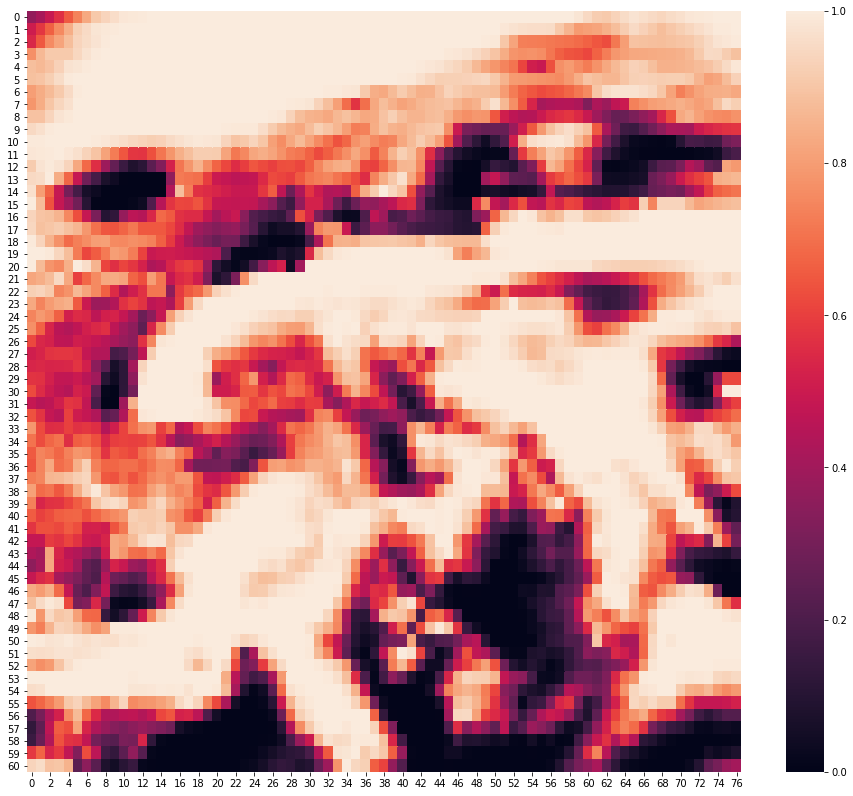

In [69]:
t0 = tcc[31][:][:]
plt.figure(figsize = (16,14))
ax = sns.heatmap(t0,cmap = sns.color_palette("Blues").reverse()) # annot=True, displays the numbers. We should have a finer resolution.
plt.show()

In [15]:
from mpl_toolkits.basemap import Basemap, cm
# requires netcdf4-python (netcdf4-python.googlecode.com)
#from netCDF4 import Dataset as NetCDFFile
import numpy as np
import matplotlib.pyplot as plt

# plot rainfall from NWS using special precipitation
# colormap used by the NWS, and included in basemap.

data = tcc[0][:][:]
# tcc(time, latitude, longitude)
data.shape
#latcorners = lat[:]
#loncorners = -long['lon'][:]
#lon_0 = -long.getValue()
#lat_0 = lat.getValue()
plt.figure(figsize = (12,8))
plt.plot(data)
plt.show()

KeyError: 'PROJ_LIB'

In [ ]:
# create figure and axes instances
fig = plt.figure(figsize=(8,8))
ax = fig.add_axes([0.1,0.1,0.8,0.8])
# create polar stereographic Basemap instance.
m = Basemap(projection='stere',lon_0=lon_0,lat_0=90.,lat_ts=lat_0,\
            llcrnrlat=latcorners[0],urcrnrlat=latcorners[2],\
            llcrnrlon=loncorners[0],urcrnrlon=loncorners[2],\
            rsphere=6371200.,resolution='l',area_thresh=10000)


# draw coastlines, state and country boundaries, edge of map.
m.drawcoastlines()
m.drawstates()
m.drawcountries()
# draw parallels.
parallels = np.arange(0.,90,10.)
m.drawparallels(parallels,labels=[1,0,0,0],fontsize=10)
# draw meridians
meridians = np.arange(180.,360.,10.)
m.drawmeridians(meridians,labels=[0,0,0,1],fontsize=10)
ny = data.shape[0]; nx = data.shape[1]
lons, lats = m.makegrid(nx, ny) # get lat/lons of ny by nx evenly space grid.
x, y = m(lons, lats) # compute map proj coordinates.
# draw filled contours.
clevs = [0,1,2.5,5,7.5,10,15,20,30,40,50,70,100,150,200,250,300,400,500,600,750]
cs = m.contourf(x,y,data,clevs,cmap=cm.s3pcpn)
# add colorbar.
cbar = m.colorbar(cs,location='bottom',pad="5%")
cbar.set_label('tcc')
# add title
plt.title("testing")
plt.show()